# **Capstone Project : Battle of Neighborhood** #

#                               **Title : "Recommending Hospital need in the near vicinity of high prone Accident Areas"** #

### Import necessary Libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library

print('Libraries imported.')

Solving environment: done

## Package Plan ##

  environment location: /home/jupyterlab/conda

  added / updated specs: 
    - geopy


The following packages will be downloaded:

    package                    |            build
    ---------------------------|-----------------
    openssl-1.0.2p             |       h470a237_1         3.1 MB  conda-forge
    certifi-2018.10.15         |        py36_1000         138 KB  conda-forge
    geopy-1.17.0               |             py_0          49 KB  conda-forge
    ca-certificates-2018.10.15 |       ha4d7672_0         135 KB  conda-forge
    conda-4.5.11               |        py36_1000         651 KB  conda-forge
    geographiclib-1.49         |             py_0          32 KB  conda-forge
    ------------------------------------------------------------
                                           Total:         4.1 MB

The following NEW packages will be INSTALLED:

    geographiclib:   1.49-py_0            conda-forge
    geopy:           

In [2]:
import random # library for random number generation
import numpy as np # library for vectorized computation
import pandas as pd # library to process data as dataframes

import matplotlib.pyplot as plt # plotting library
# backend for rendering plots within the browser
%matplotlib inline 

from sklearn.cluster import KMeans 
from sklearn.datasets.samples_generator import make_blobs

print('Libraries imported.')

Libraries imported.


### Define Foursquare Credentials and Version

In [3]:
CLIENT_ID = '1WWWRQ4HBJB0PSQD3JBWBJ0HQOTYE5BY0LT4KGZ0SYJJCCYC' # your Foursquare ID
CLIENT_SECRET = 'KA4SVWYSX0WLQTLSMYZYPY2R312CMIVFPR5BPLQE5SBVOJCT' # your Foursquare Secret
VERSION = '20180604'
LIMIT = 30
print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: 1WWWRQ4HBJB0PSQD3JBWBJ0HQOTYE5BY0LT4KGZ0SYJJCCYC
CLIENT_SECRET:KA4SVWYSX0WLQTLSMYZYPY2R312CMIVFPR5BPLQE5SBVOJCT


#### Loading the Austin Traffic Incidents reports data present in a csv format to a Pandas Datafreame

In [4]:
#file="labs/DP0701EN/Austin_Accident_Data_Final.csv"
df_Austin = pd.read_csv("Austin_Accident_Data_Final.csv")
df_Austin.head(20)



,Accident Date,Issue Reported,Latitude,Longitude,Address
0,08/07/2018 09:53:54 PM +0000,COLLISION WITH INJURY,30.120700,-97.635260,13911-14905 FM 812 RD
1,11/02/2017 02:10:00 PM +0000,COLLISION WITH INJURY,30.120700,-97.635260,13911-14905 FM 812 RD
2,11/12/2017 02:22:00 AM +0000,COLLISION WITH INJURY,30.120700,-97.635260,Elroy Rd & Fm 812 Rd
3,11/16/2017 01:07:00 PM +0000,COLLISION WITH INJURY,30.120700,-97.635260,Fm 812 Rd & Elroy Rd
4,10/16/2017 06:22:00 AM +0000,COLLISION WITH INJURY,30.120700,-97.635260,13912 FM 812 RD
5,05/08/2018 01:02:00 PM +0000,COLLISION WITH INJURY,30.115334,-97.695139,S US 183 HWY & S FM 973 RD
6,10/29/2017 06:24:00 PM +0000,COLLISION WITH INJURY,30.115334,-97.695139,S Fm 973 Rd & S Us 183 Hwy
7,04/15/2018 06:29:00 PM +0000,COLLISION WITH INJURY,30.115334,-97.695139,S Us 183 Hwy & S Fm 973 Rd
8,02/07/2018 07:51:00 PM +0000,COLLISION WITH INJURY,30.115334,-97.695139,S US 183 HWY & S FM 973 RD
9,12/21/2017 01:51:00 PM +0000,COLLISION WITH INJURY,30.115334,-97.695139,S Us 183 Hwy & S Fm 973 Rd


#### Creating dataframe for plotting BAR PLOT between Issue Reported and Count of Accidents

In [5]:
df_Barplot = pd.DataFrame()
df_Barplot = df_Austin[['Issue Reported']]
##df_AustinGrp = df_AustinGrp.groupby(['Latitude','Longitude'])['Latitude','Longitude'].count()
df_Barplot = df_Barplot.groupby(['Issue Reported'])[['Issue Reported']].count()
df_Barplot.rename(columns={'Issue Reported': 'Counts'}, inplace=True)
df_Barplot = df_Barplot.sort_values('Counts',ascending=False)
df_Barplot = df_Barplot.reset_index()
df_Barplot.head(10)

,Issue Reported,Counts
0,Crash Urgent,191
1,Traffic Hazard,45
2,COLLISION WITH INJURY,26
3,Crash Service,13
4,zSTALLED VEHICLE,12
5,Traffic Impediment,7
6,COLLISION,3
7,COLLISN/ LVNG SCN,1
8,TRFC HAZD/ DEBRIS,1


In [6]:
df_Barplot.set_index(['Issue Reported'], inplace=True)
df_Barplot

,Counts
Issue Reported,
Crash Urgent,191
Traffic Hazard,45
COLLISION WITH INJURY,26
Crash Service,13
zSTALLED VEHICLE,12
Traffic Impediment,7
COLLISION,3
COLLISN/ LVNG SCN,1
TRFC HAZD/ DEBRIS,1


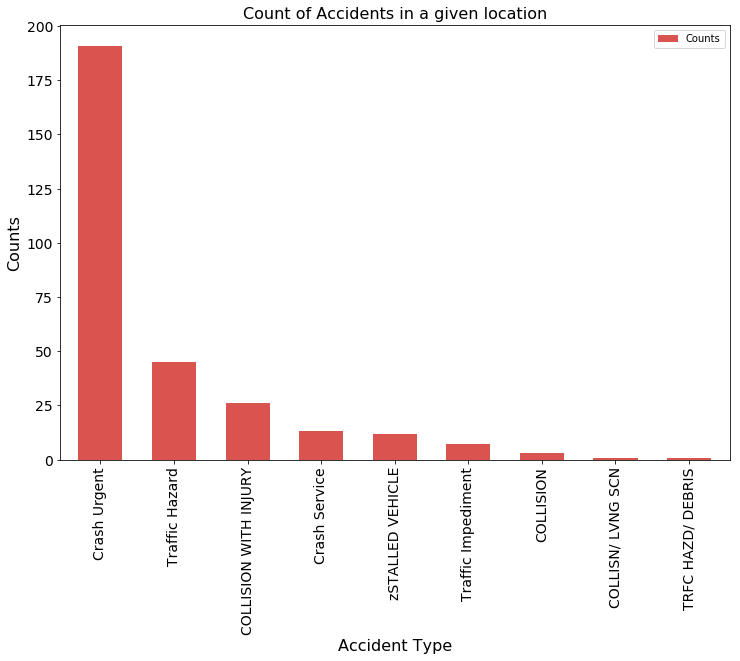

In [7]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

barWidth = 0.6
ax = df_Barplot.plot(kind='bar', figsize=(12, 8), legend=True, fontsize=14, color = ['#d9534f'], width = barWidth)

plt.ylabel('Counts',size = 16) # add to x-label to the plot
plt.xlabel('Accident Type',size = 16) # add y-label to the plot
plt.title('Count of Accidents in a given location', size = 16) # add title to the plot


plt.show()

#### Creating dataframe for plotting BAR PLOT between Area name of Accidensts and thier respective Counts

In [8]:
df_Barplot2 = pd.DataFrame()
df_Barplot2 = df_Austin[['Address']]
df_Barplot2 = df_Barplot2.groupby(['Address'])[['Address']].count()
df_Barplot2.rename(columns={'Address': 'Counts'}, inplace=True)
df_Barplot2 = df_Barplot2.sort_values('Counts',ascending=False)
df_Barplot2 = df_Barplot2.reset_index()
df_Barplot2.set_index(['Address'], inplace=True)
df_Barplot2
df_Barplot2

limit = 20
df_Top30AccPlace = df_Barplot2.iloc[0:limit, :]
df_Top30AccPlace

,Counts
Address,
W Parmer Ln & Mc Neil Dr,32
Mc Neil Dr & W Parmer Ln,27
W Slaughter Ln & Manchaca Rd,19
N 183a Hwy Svrd Nb & Lakeline Blvd,16
S 1st St & W Slaughter Ln,13
W Slaughter Ln & Cullen Ln,12
Manchaca Rd & W Slaughter Ln,12
Lakeline Blvd & N Us 183 Hwy Svrd Nb,11
N Us 183 Hwy Svrd Sb & Lakeline Blvd,9


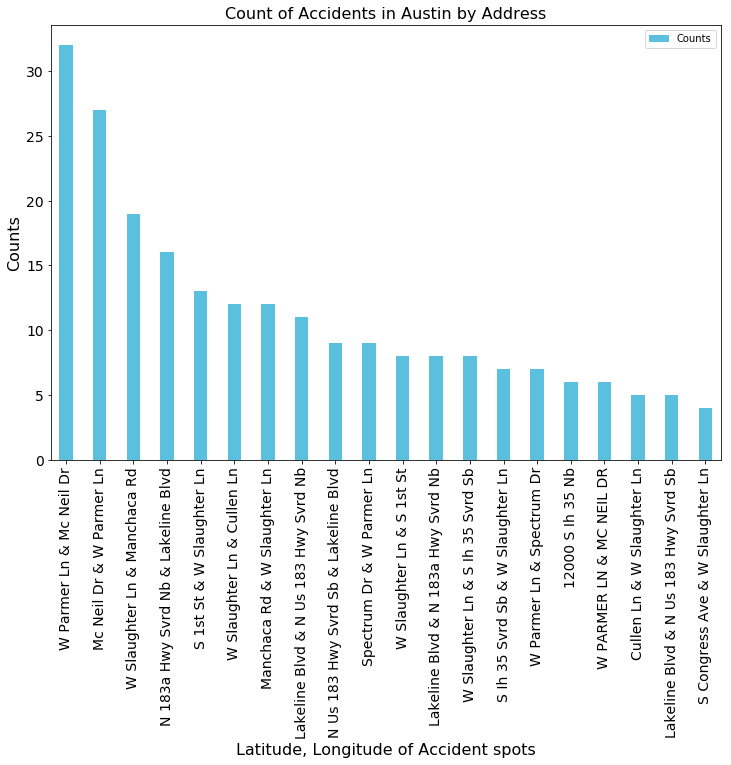

In [9]:
%matplotlib inline

import matplotlib as mpl
import matplotlib.pyplot as plt

barWidth = 0.4
ax = df_Top30AccPlace.plot(kind='bar', figsize=(12, 8), legend=True, fontsize=14, color = ['#5bc0de'], width = barWidth)

plt.ylabel('Counts',size = 16) # add to x-label to the plot
plt.xlabel('Latitude, Longitude of Accident spots',size = 16) # add y-label to the plot
plt.title('Count of Accidents in Austin by Address', size = 16) # add title to the plot


plt.show()

#### Plotting the map of Austin, Texas and plotting the accident locations on it

In [10]:
address = 'Austin, Texas'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Austin are {}, {}.'.format(latitude, longitude))

/home/jupyterlab/conda/lib/python3.6/site-packages/geopy/geocoders/osm.py:143: UserWarning: Using Nominatim with the default "geopy/1.17.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  UserWarning


The geograpical coordinate of Austin are 30.2711286, -97.7436995.


In [14]:
df_AustinGrp = pd.DataFrame()
df_AustinGrp = df_Austin[['Latitude','Longitude']]
##df_AustinGrp = df_AustinGrp.groupby(['Latitude','Longitude'])['Latitude','Longitude'].count()
df_AustinGrp = df_AustinGrp.groupby(['Latitude','Longitude'])[['Latitude']].count()
df_AustinGrp.rename(columns={'Latitude': 'Counts'}, inplace=True)
df_AustinGrp = df_AustinGrp.sort_values('Counts',ascending=False)
df_AustinGrp = df_AustinGrp.reset_index()
df_AustinGrp.head(10)

,Latitude,Longitude,Counts
0,30.443859,-97.742349,74
1,30.480050,-97.801956,39
2,30.173724,-97.823807,32
3,30.172456,-97.799554,26
4,30.479426,-97.803295,22
5,30.167197,-97.790934,20
6,30.481692,-97.767094,18
7,30.167070,-97.786925,18
8,30.173871,-97.816999,12
9,30.167105,-97.788557,9


In [15]:
# create map of Manhattan using latitude and longitude values
map_austin = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, label in zip(df_AustinGrp['Latitude'], df_AustinGrp['Longitude'], df_AustinGrp['Counts']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_austin)  
    
map_austin

### **USE CASE : 1**  
#### **Among all the spots identified, taking the hishest number of accident spot and identfying hospitals surrounding it**

In [16]:
limit = 1
df_TopAccPlace = df_AustinGrp.iloc[0:limit, :]
df_TopAccPlace


,Latitude,Longitude,Counts
0,30.443859,-97.742349,74


In [17]:
latitude = 30.443859
longitude = -97.742349

search_query = 'Medical'
radius = 1000
print(search_query + ' .... OK!')



Medical .... OK!


#### Setting up the Foursquare API URL to Search for all the hospitals present for the identified coordinates

In [18]:
url = 'https://api.foursquare.com/v2/venues/search?client_id=1WWWRQ4HBJB0PSQD3JBWBJ0HQOTYE5BY0LT4KGZ0SYJJCCYC&client_secret=KA4SVWYSX0WLQTLSMYZYPY2R312CMIVFPR5BPLQE5SBVOJCT&ll=30.3991936,-97.746642&v=201806030&query=Medical&radius=1000&limit=20'.format(CLIENT_ID, CLIENT_SECRET, latitude, longitude, VERSION, search_query, radius, LIMIT)
url

'https://api.foursquare.com/v2/venues/search?client_id=1WWWRQ4HBJB0PSQD3JBWBJ0HQOTYE5BY0LT4KGZ0SYJJCCYC&client_secret=KA4SVWYSX0WLQTLSMYZYPY2R312CMIVFPR5BPLQE5SBVOJCT&ll=30.3991936,-97.746642&v=201806030&query=Medical&radius=1000&limit=20'

#### Send the GET Request and examine the results

In [19]:
results = requests.get(url).json()
results

{'meta': {'code': 200, 'requestId': '5bdaef566a6071168867e2c7'},
 'response': {'venues': [{'id': '5318c663498e0008a6a57daf',
    'name': 'Medpro Medical Testing Center',
    'location': {'address': '4515 Seton Center Pkwy',
     'lat': 30.401288,
     'lng': -97.742679,
     'labeledLatLngs': [{'label': 'display',
       'lat': 30.401288,
       'lng': -97.742679}],
     'distance': 446,
     'postalCode': '78759',
     'cc': 'US',
     'city': 'Austin',
     'state': 'TX',
     'country': 'United States',
     'formattedAddress': ['4515 Seton Center Pkwy',
      'Austin, TX 78759',
      'United States']},
    'categories': [{'id': '4bf58dd8d48988d104941735',
      'name': 'Medical Center',
      'pluralName': 'Medical Centers',
      'shortName': 'Medical',
      'icon': {'prefix': 'https://ss3.4sqi.net/img/categories_v2/building/medical_',
       'suffix': '.png'},
      'primary': True}],
    'referralId': 'v-1541074774',
    'hasPerk': False},
   {'id': '503bd6b9e4b0fd3718b68b7a',

#### Get relevant part of JSON and transform it into a *pandas* dataframe

In [20]:
Hospitals = results['response']['venues']

# tranform venues into a dataframe
df_Hospital = json_normalize(Hospitals)
df_Hospital.head(10)

,categories,hasPerk,id,location.address,location.cc,location.city,location.country,location.distance,location.formattedAddress,location.labeledLatLngs,location.lat,location.lng,location.postalCode,location.state,name,referralId,venuePage.id
0,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,5318c663498e0008a6a57daf,4515 Seton Center Pkwy,US,Austin,United States,446,"[4515 Seton Center Pkwy, Austin, TX 78759, Uni...","[{'label': 'display', 'lat': 30.401288, 'lng':...",30.401288,-97.742679,78759,TX,Medpro Medical Testing Center,v-1541074774,NaN
1,"[{'id': '4bf58dd8d48988d127941735', 'name': 'C...",False,503bd6b9e4b0fd3718b68b7a,NaN,US,Austin,United States,381,"[Austin, TX 78759, United States]","[{'label': 'display', 'lat': 30.397111, 'lng':...",30.397111,-97.743491,78759,TX,P And H Medical Supply,v-1541074774,NaN
2,"[{'id': '4bf58dd8d48988d104941735', 'name': 'M...",False,5580fcbf498e02a81c20604a,11111 Research Blvd,US,Austin,United States,731,"[11111 Research Blvd, Austin, TX 78759, United...","[{'label': 'display', 'lat': 30.4054641, 'lng'...",30.405464,-97.744353,78759,TX,Dell Children's Eye Center,v-1541074774,133670550


#### Cleansing the data by removing the Pets, vetnerary, lab test centers from the dataframe 

In [21]:
df_HospFinal = pd.DataFrame()
df_HospFinal = df_Hospital[['name', 'location.lat','location.lng']]
df_HospFinal = df_HospFinal[df_HospFinal["name"].str.contains('Testing|Supply|Pet|Vetnary')==False]
df_HospFinal




,name,location.lat,location.lng
2,Dell Children's Eye Center,30.405464,-97.744353


#### Create a map of Austin, texas with all the accident's coordinates superimposed on top.

In [22]:
if len(results['response']['venues']) == 0:
    venues_map = 'There is no medical center in the radius of 1 KM from the highest accident spot, Hence recommend to open a same basis urgency!'

else:
    venues_map = folium.Map(location=[latitude, longitude], zoom_start=12) # generate map centred around Ecco


    # add the existing medical centers as blue circle markers
    for lat, lng, label in zip(df_HospFinal['location.lat'], df_HospFinal['location.lng'], df_HospFinal['name']):
        folium.features.CircleMarker(
            [lat, lng],
            radius=5,
            poup=label,
            fill=True,
            color='red',
            fill_color='#3186cc',
            fill_opacity=0
        ).add_to(venues_map)

venues_map

### **USE CASE : 2**  
#### ***k*-means on all the coordinates (Latitudes and Longitudes) of accident areas**

#### Converting the datafrmae populated above in to Lists for Clustering

In [23]:
List_AccLat = df_AustinGrp['Latitude'].tolist()
print (List_AccLat)

List_AccLong = df_AustinGrp['Longitude'].tolist()
print (List_AccLong)


[30.443859000000003, 30.48005, 30.173724, 30.172456, 30.479426, 30.167196999999998, 30.481692, 30.167070000000002, 30.173871000000002, 30.167105, 30.115334000000004, 30.128259000000003, 30.1207, 30.135477, 30.141033, 30.173871000000002, 30.48005]
[-97.742349, -97.801956, -97.82380699999999, -97.799554, -97.80329499999999, -97.790934, -97.767094, -97.786925, -97.816999, -97.788557, -97.695139, -97.800543, -97.63526, -97.797997, -97.84661, -97.781748, -97.801965]


#### Define a function that assigns each datapoint to a cluster

In [24]:
colors_map = np.array(['b', 'r'])
def assign_members(List_AccLat, List_AccLong, centers):
    compare_to_first_center = np.sqrt(np.square(np.array(List_AccLat) - centers[0][0]) + np.square(np.array(List_AccLong) - centers[0][1]))
    compare_to_second_center = np.sqrt(np.square(np.array(List_AccLat) - centers[1][0]) + np.square(np.array(List_AccLong) - centers[1][1]))
    class_of_points = compare_to_first_center > compare_to_second_center
    colors = colors_map[class_of_points + 1 - 1]
    return colors, class_of_points

print('assign_members function defined!')

assign_members function defined!


#### Define a function that updates the centroid of each cluster

In [25]:
# update means
def update_centers(List_AccLat, List_AccLong, class_of_points):
    center1 = [np.mean(np.array(List_AccLat)[~class_of_points]), np.mean(np.array(List_AccLong)[~class_of_points])]
    center2 = [np.mean(np.array(List_AccLat)[class_of_points]), np.mean(np.array(List_AccLong)[class_of_points])]
    return [center1, center2]

print('assign_members function defined!')

assign_members function defined!


#### Define a function that plots the data points along with the cluster centroids

In [26]:
def plot_points(centroids=None, colors='g', figure_title=None):
    # plot the figure
    fig = plt.figure(figsize=(15, 10))  # create a figure object
    ax = fig.add_subplot(1, 1, 1)
    
    centroid_colors = ['bx', 'rx']
    if centroids:
        for (i, centroid) in enumerate(centroids):
            ax.plot(centroid[0], centroid[1], centroid_colors[i], markeredgewidth=5, markersize=20)
    plt.scatter(List_AccLat, List_AccLong, s=500, c=colors)
    
    # define the ticks
    xticks = np.linspace(30.1, 30.6, 6, endpoint=True)
    yticks = np.linspace(-97.5, -98, 6, endpoint=True)

    # fix the horizontal axis
    ax.set_xticks(xticks)
    ax.set_yticks(yticks)

    # add tick labels
    xlabels = xticks
    ax.set_xticklabels(xlabels)
    ylabels = yticks
    ax.set_yticklabels(ylabels)

    # style the ticks
    ax.xaxis.set_ticks_position('bottom')
    ax.yaxis.set_ticks_position('left')
    ax.tick_params('both', length=2, width=1, which='major', labelsize=15)
    
    # add labels to axes
    ax.set_xlabel('List_AccLat', fontsize=20)
    ax.set_ylabel('List_AccLong', fontsize=20)
    
    # add title to figure
    ax.set_title(figure_title, fontsize=24)

    plt.show()

print('plot_points function defined!')

plot_points function defined!


#### Initialize *k*-means - plot data points

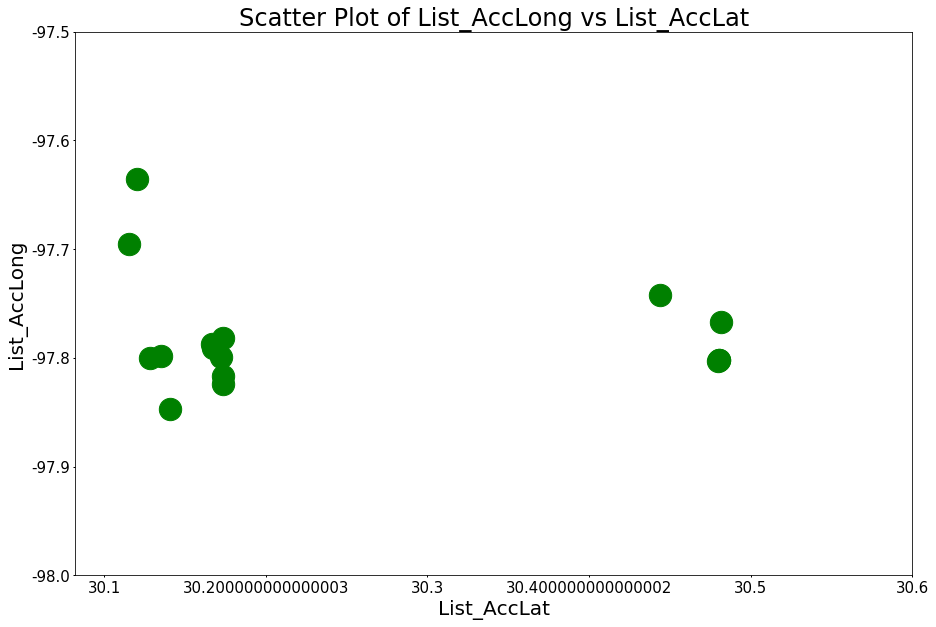

In [27]:
plot_points(figure_title='Scatter Plot of List_AccLong vs List_AccLat')

#### Initialize *k*-means - randomly define clusters centers and add them to plot

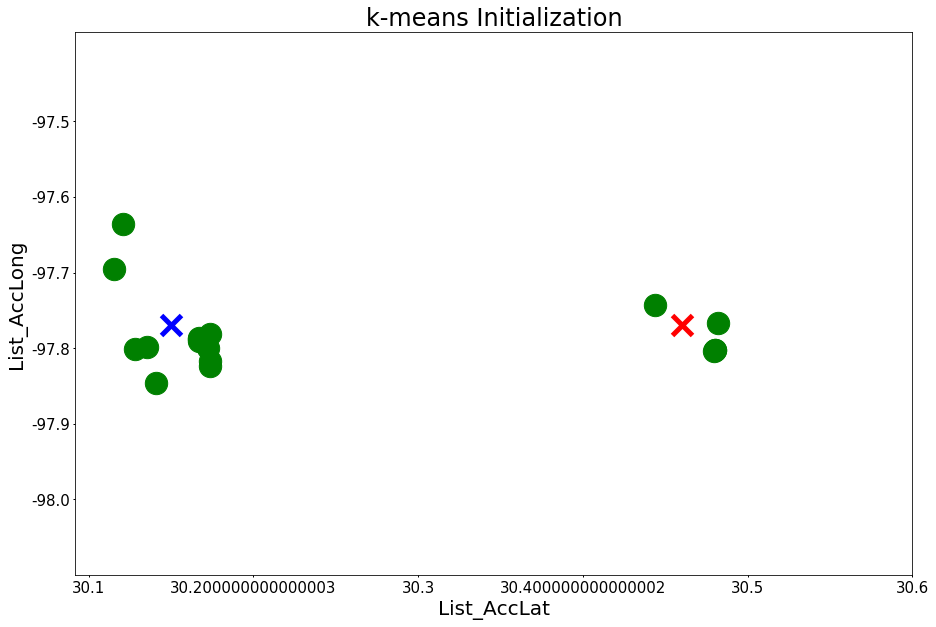

In [28]:
centers = [[30.15, -97.77], [30.46, -97.77]]
plot_points(centers, figure_title='k-means Initialization')

#### Run *k*-means (4-iterations only)

Iteration 1 - Press Enter to update the members of each cluster 


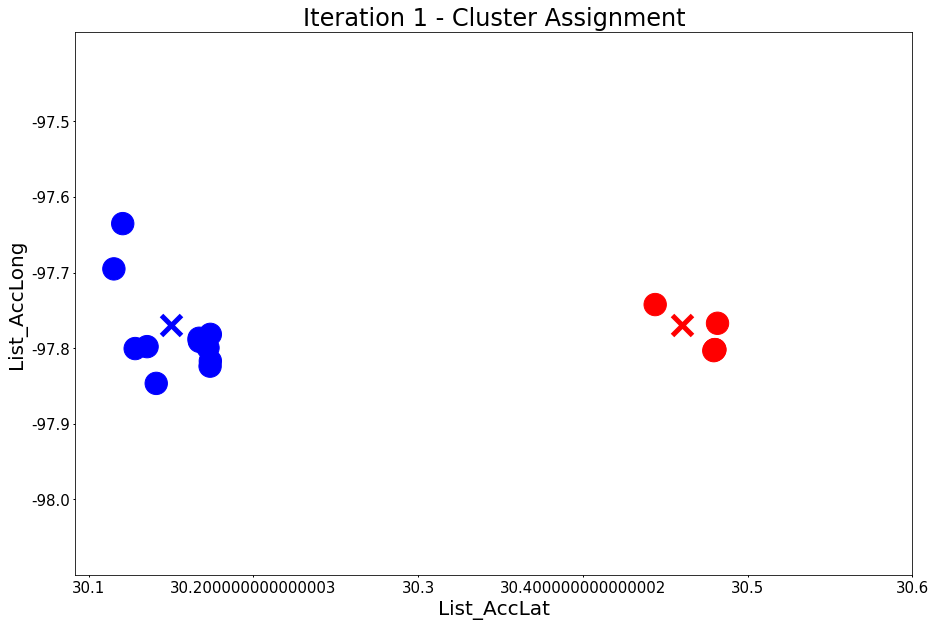

Iteration 1 - Press Enter to update the centers 


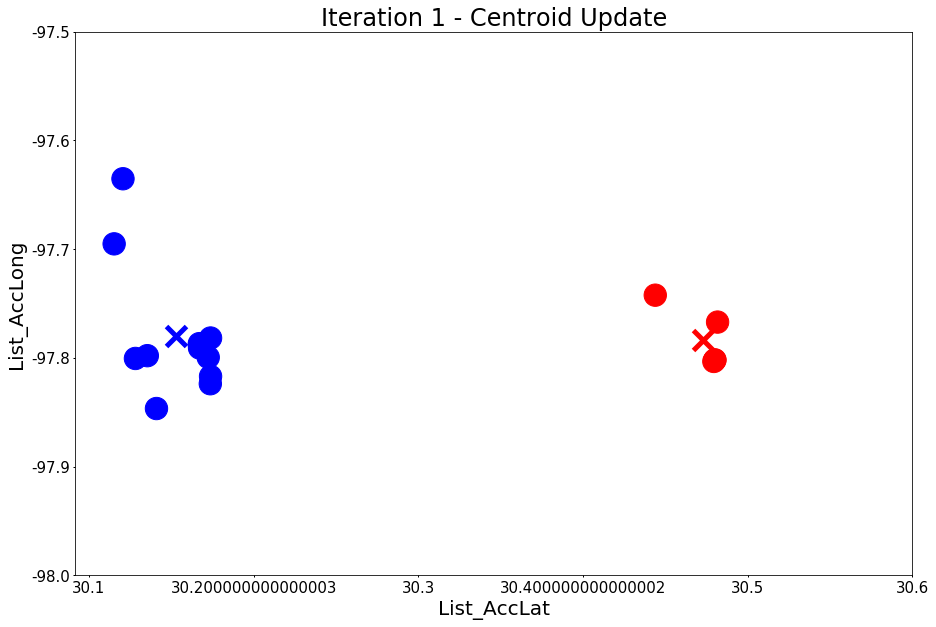

Iteration 2 - Press Enter to update the members of each cluster 


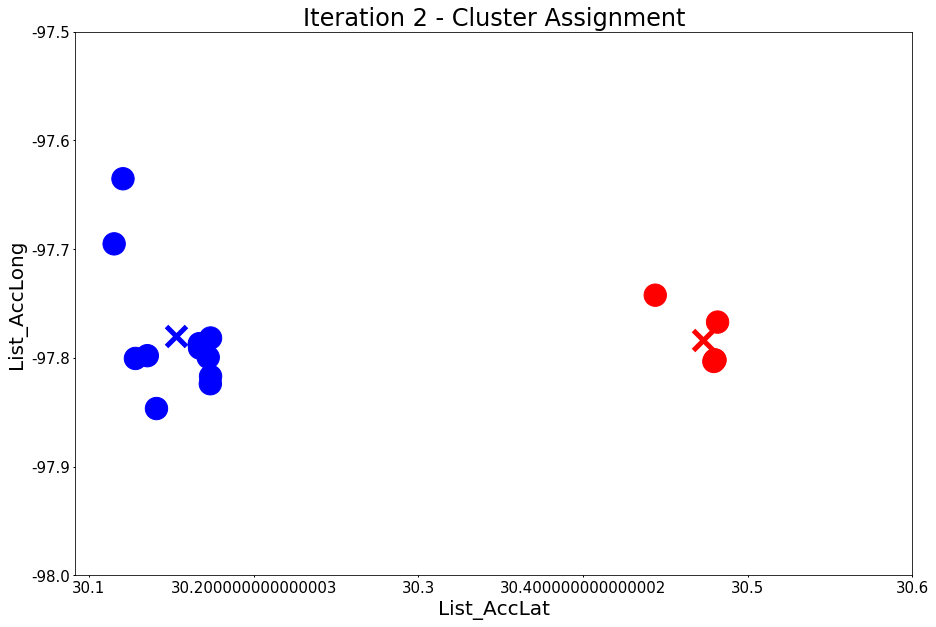

Iteration 2 - Press Enter to update the centers 


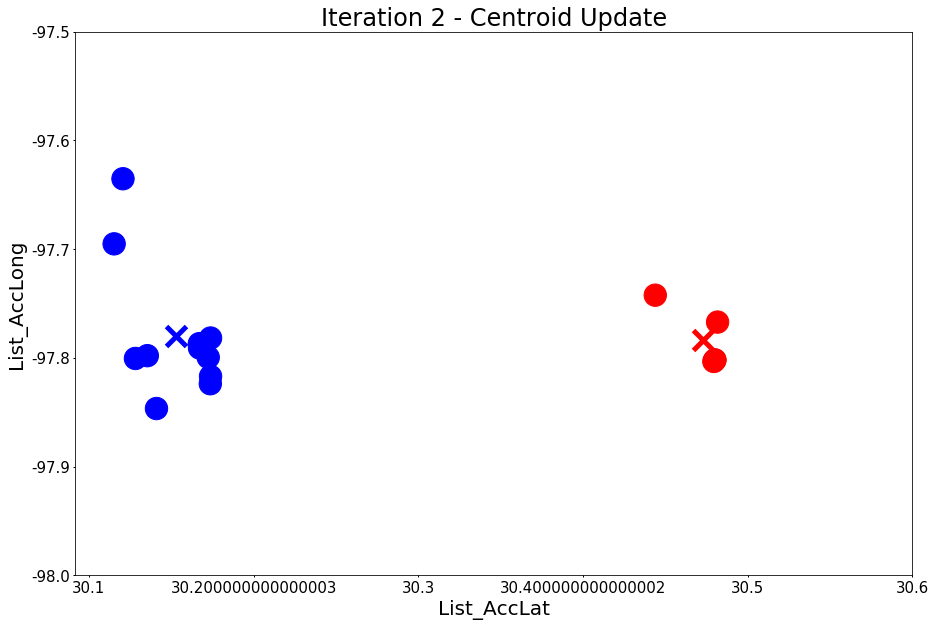

Iteration 3 - Press Enter to update the members of each cluster 


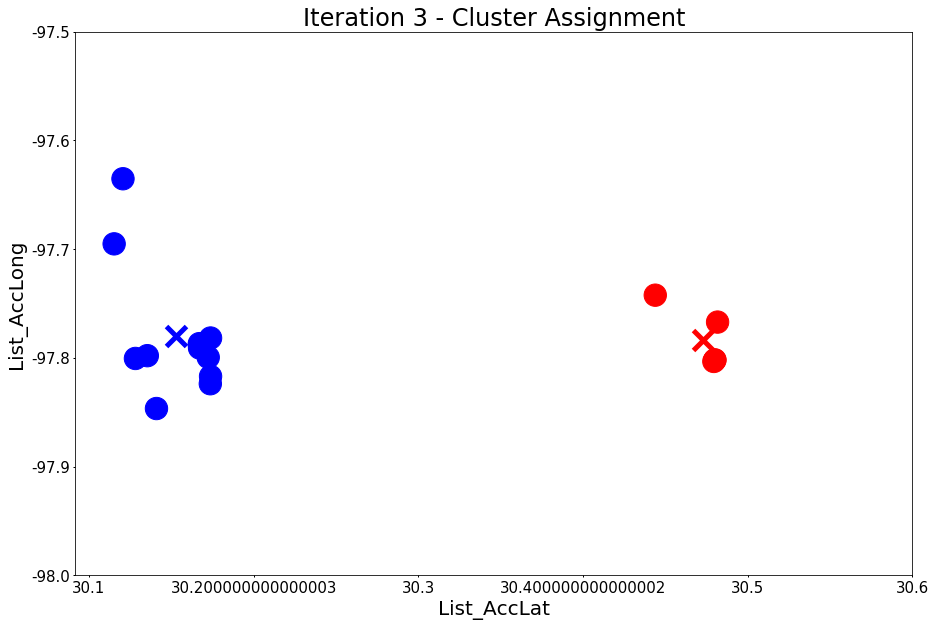

Iteration 3 - Press Enter to update the centers 


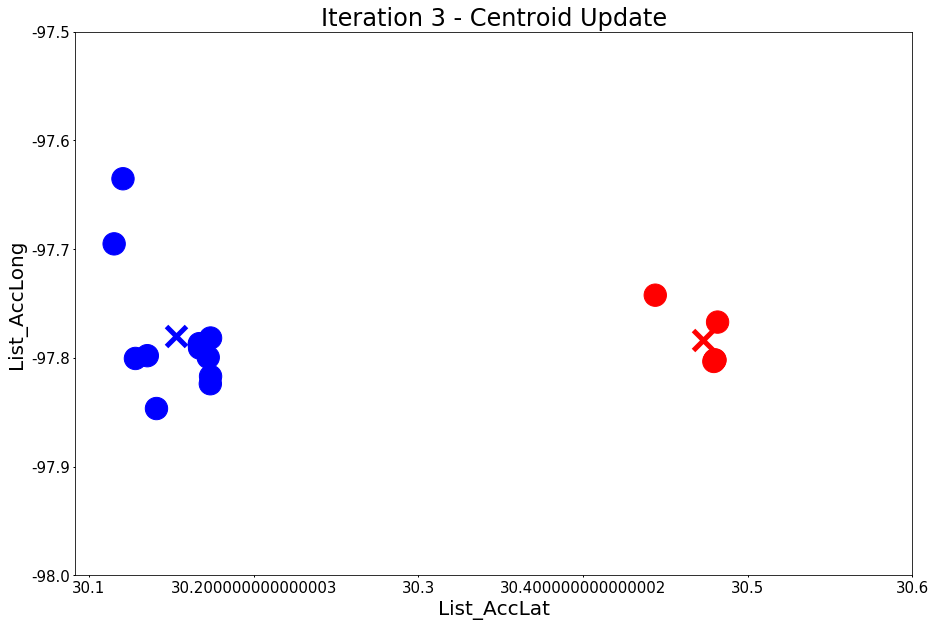

Iteration 4 - Press Enter to update the members of each cluster 


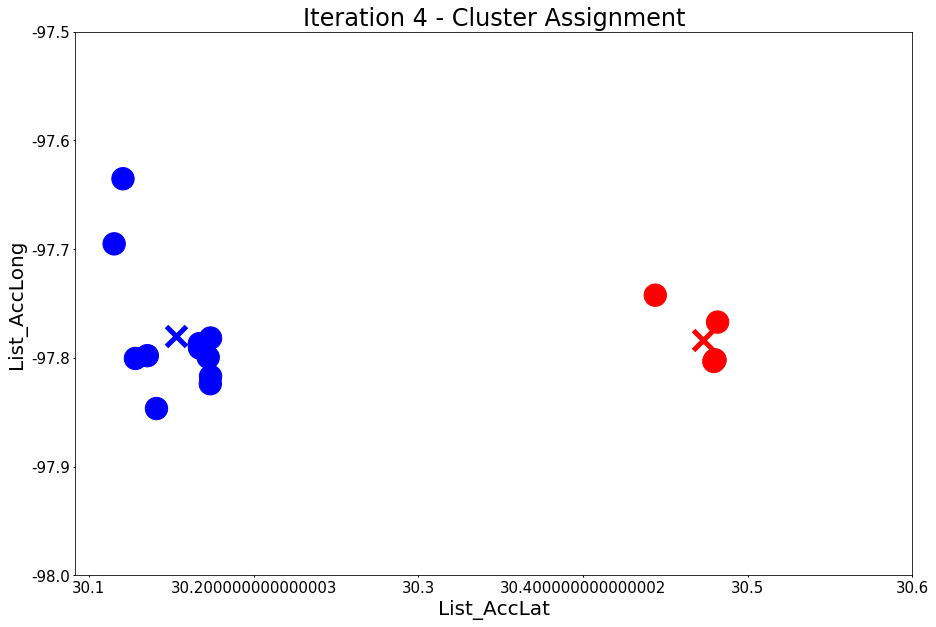

Iteration 4 - Press Enter to update the centers 


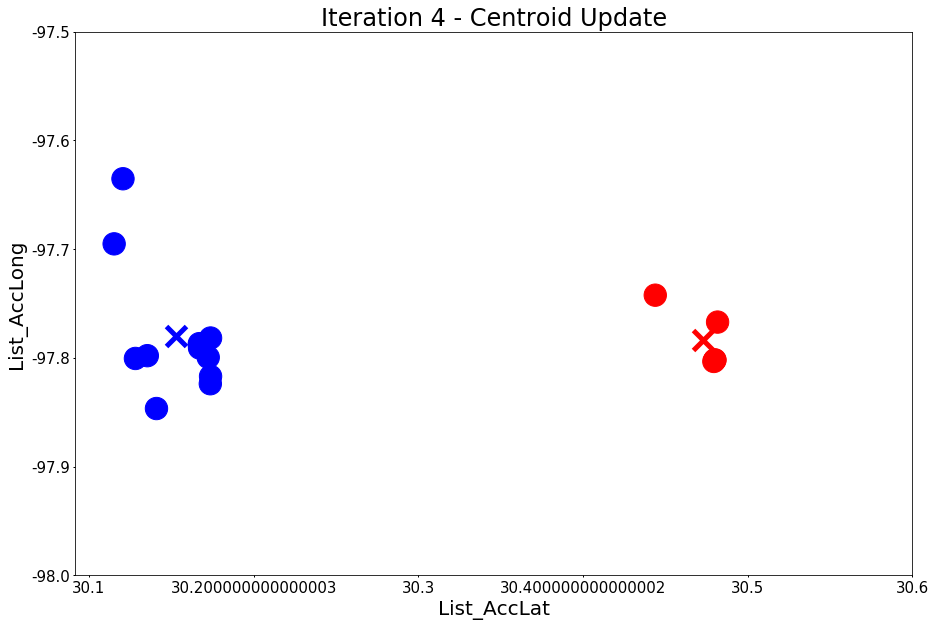

In [30]:
number_of_iterations = 4
for i in range(number_of_iterations):
    input('Iteration {} - Press Enter to update the members of each cluster'.format(i + 1))
    colors, class_of_points = assign_members(List_AccLat, List_AccLong, centers)
    title = 'Iteration {} - Cluster Assignment'.format(i + 1)
    plot_points(centers, colors, figure_title=title)
    input('Iteration {} - Press Enter to update the centers'.format(i + 1))
    centers = update_centers(List_AccLat, List_AccLong, class_of_points)
    title = 'Iteration {} - Centroid Update'.format(i + 1)
    plot_points(centers, colors, figure_title=title)

## ***So, based on the above Centroid, the 2 main locations where Hospital can be opened for all the high accedient prone vicinities.***

### The coordinates are:

### **1) 30.15, -97.77**

### **2) 30.47, -97.78**

